### Часть 2
Используя скаченные данные и `Pandas` (или `PySpark`) посчитайте:
- явку (%) по всем ТИК, результат отсортировать по убыванию
- выберите произвольного кандидата и найдите тот избиратльный участок, на котором он получил наибольший результат  (%, учитывать участки на которых проголосовало больше 100 человек)
- найдите ТИК, где разница между УИК с наибольшей явкой и наименьшей максимальна
- посчитайте дисперсию по явке для каждого ТИК (учитывать УИК)
- для каждого кандидата посчитайте таблицу: результат (%, округленный до целого) - количество УИК, на которых кандидат получил данный результат
- визуализируйте отношение - явка на УИК $\rightarrow$ результат кандидата. 

### 1) Посчитайте явку (%) по всем ТИК, результат отсортировать по убыванию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('elections.csv')
df.head()

,Комиссия,УИК,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,Амосов Михаил Иванович %,Беглов Александр Дмитриевич,Беглов Александр Дмитриевич %,Тихонова Надежда Геннадьевна,Тихонова Надежда Геннадьевна %
0,Территориальная избирательная комиссия №1,УИК №1,1803,1200,587,11,602,11,587,23,575,0,0,110,18.39,345,57.69,120,20.07
1,Территориальная избирательная комиссия №1,УИК №2,1466,1100,433,14,653,14,430,19,425,0,0,53,11.94,326,73.42,46,10.36
2,Территориальная избирательная комиссия №1,УИК №3,2092,1600,576,22,1002,22,576,15,583,0,0,155,25.92,332,55.52,96,16.05
3,Территориальная избирательная комиссия №1,УИК №4,1056,1000,318,4,678,4,318,13,309,0,0,67,20.81,171,53.11,71,22.05
4,Территориальная избирательная комиссия №1,УИК №5,1827,1400,495,8,897,8,493,16,485,0,0,137,27.35,266,53.09,82,16.37


In [3]:
tiks = df.groupby('Комиссия').sum()
tiks['Явка %'] = round(100 * (tiks.iloc[:,2] + tiks.iloc[:,3]) / tiks.iloc[:,0], 2)
tiks = tiks.sort_values(by=['Явка %'],ascending = False)
tiks.head()

,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,Амосов Михаил Иванович %,Беглов Александр Дмитриевич,Беглов Александр Дмитриевич %,Тихонова Надежда Геннадьевна,Тихонова Надежда Геннадьевна %,Явка %
Комиссия,,,,,,,,,,,,,,,,,,
Территориальная избирательная комиссия №18,94434,67559,47349,1314,18896,1314,46600,1076,46838,0,0,5753,701.72,36632,4116.17,4453,548.85,51.53
Территориальная избирательная комиссия №15,35191,27750,13329,752,13669,752,13327,394,13685,0,0,1718,368.79,9780,2111.35,2187,435.71,40.01
Территориальная избирательная комиссия №13,47955,40450,17519,1506,21424,1506,17506,556,18456,1,0,2597,504.17,13274,2585.74,2585,502.91,39.67
Территориальная избирательная комиссия №19,143014,123947,51433,2644,69869,2644,51223,579,53288,1,0,8379,1327.97,37091,5049.62,7818,1209.05,37.81
Территориальная избирательная комиссия №8,84723,65630,29626,909,35095,909,29596,1110,29395,0,0,4156,592.63,20635,3092.75,4604,642.91,36.04


### 2) Выберите произвольного кандидата и найдите тот избиратльный участок, на котором он получил наибольший результат (%, учитывать участки на которых проголосовало больше 100 человек)

In [4]:
df_filter = df[df['Число действительных избирательных бюллетеней'] > 100]
df.loc[df_filter['Беглов Александр Дмитриевич %'].idxmax()]['Комиссия']

'Территориальная избирательная комиссия №22'

### 3) Найдите ТИК, где разница между УИК с наибольшей явкой и наименьшей максимальна

In [5]:
df['Явка'] = round(100 * (df.iloc[:,4] + df.iloc[:,5]) / df.iloc[:,2], 2)

df1 = df.groupby("Комиссия")['Явка'].agg(['max','min'])
df1['diff'] = df1['max'] - df1['min']
df1.idxmax()['diff']

'Территориальная избирательная комиссия №17'

### 4) Посчитайте дисперсию по явке для каждого ТИК (учитывать УИК)

In [6]:
df.groupby('Комиссия')['Явка'].var()

Комиссия
Территориальная избирательная комиссия №1     193.182492
Территориальная избирательная комиссия №10     74.089792
Территориальная избирательная комиссия №11    239.452137
Территориальная избирательная комиссия №12     33.217540
Территориальная избирательная комиссия №13    393.513431
Территориальная избирательная комиссия №14     30.728267
Территориальная избирательная комиссия №15    416.084102
Территориальная избирательная комиссия №16    113.463276
Территориальная избирательная комиссия №17    329.331316
Территориальная избирательная комиссия №18    230.702131
Территориальная избирательная комиссия №19    204.701581
Территориальная избирательная комиссия №2     460.189470
Территориальная избирательная комиссия №20    173.579607
Территориальная избирательная комиссия №21    310.193498
Территориальная избирательная комиссия №22    450.046257
Территориальная избирательная комиссия №23    586.702704
Территориальная избирательная комиссия №24    271.107408
Территориальная избира

### 5) Для каждого кандидата посчитайте таблицу: результат (%, округленный до целого) - количество УИК, на которых кандидат получил данный результат

In [7]:
table= df[['УИК','Амосов Михаил Иванович %','Беглов Александр Дмитриевич %','Тихонова Надежда Геннадьевна %']]
table.iloc[:,1:] =table.iloc[:,1:].apply(lambda x: round(x)).astype(int)
print(table['Амосов Михаил Иванович %'].value_counts(sort = False))
print(table['Беглов Александр Дмитриевич %'].value_counts(sort = False))
print(table['Тихонова Надежда Геннадьевна %'].value_counts(sort = False))

0       1
1       6
2       6
3       2
4      13
5      18
6      26
7      34
8      48
9      68
10     89
11    100
12    117
13    129
14    133
15    159
16    154
17    149
18    128
19    100
20     91
21     81
22     78
23     43
24     57
25     40
26     45
27     26
28     26
29     17
30     15
31      4
32      7
33      4
34      1
35      3
36      2
42      1
Name: Амосов Михаил Иванович %, dtype: int64
30      1
32      1
33      2
38      3
39      3
40      3
41      5
42      3
43      3
44      9
45      8
46     11
47     20
48     15
49     23
50     27
51     37
52     38
53     43
54     36
55     52
56     62
57     67
58     78
59     78
60    123
61     92
62     93
63     97
64     90
     ... 
68     78
69     61
70     72
71     49
72     53
73     39
74     38
75     38
76     28
77     23
78     19
79     20
80     20
81     25
82     13
83     14
84     15
85      9
86      7
87      7
88      5
89      5
90      6
91      7
92      2
93      1
94   

/Library/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### 6) Визуализируйте отношение - явка на УИК  → результат кандидата.

In [8]:
res= df[['УИК','Амосов Михаил Иванович %','Беглов Александр Дмитриевич %','Тихонова Надежда Геннадьевна %','Явка']]
res.head()

,УИК,Амосов Михаил Иванович %,Беглов Александр Дмитриевич %,Тихонова Надежда Геннадьевна %,Явка
0,УИК №1,18.39,57.69,20.07,33.17
1,УИК №2,11.94,73.42,10.36,30.49
2,УИК №3,25.92,55.52,16.05,28.59
3,УИК №4,20.81,53.11,22.05,30.49
4,УИК №5,27.35,53.09,16.37,27.53


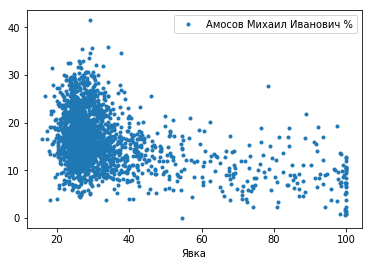

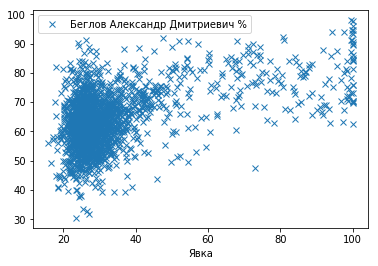

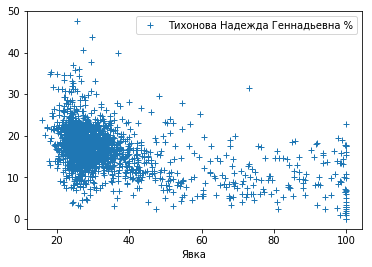

In [9]:
res.plot(x='Явка', y='Амосов Михаил Иванович %', style='.')
res.plot(x='Явка', y='Беглов Александр Дмитриевич %', style='x')
res.plot(x='Явка', y='Тихонова Надежда Геннадьевна %', style='+')
plt.show()